In [1]:
import pandas as pd

In [2]:
import numpy as np

In [7]:
df2 = pd.read_csv("HateSpeechDatasetBalanced.csv")

In [9]:
df1 = pd.read_csv('youtoxic_english_1000.csv')

In [10]:
df1 = df1[["Text", "IsHatespeech"]]
df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)
df1.head(2)


<ipython-input-10-b8a2874d4bc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)


,Text,IsHatespeech
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,0


In [11]:
df2 = df2.rename(columns={'Content':"Text","Label":"IsHatespeech"})

In [13]:
combined_df = pd.concat([df2, df1])

combined_df = combined_df.reset_index(drop=True)

combined_df.tail()

,Text,IsHatespeech
13153,I remember that they sent in the national defe...,0.0
13154,Stats don`t represent the problem. Race baitin...,1.0
13155,The quote from the mother... Wow that hit hard...,0.0
13156,this video is so racist,0.0
13157,"God, the narrator has such an annoying lisp.",0.0


In [14]:
combined_df.groupby("IsHatespeech").count()

,Text
IsHatespeech,
0.0,11348
1.0,1809


In [17]:

combined_df.to_csv("Final_Dataset.csv")

In [18]:
df =  pd.read_csv("Final_Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,Text,IsHatespeech
0,0,denial of normal the con be asked to comment o...,1
1,1,just by being able to tweet this insufferable ...,1
2,2,that is retarded you too cute to be single tha...,1
3,3,thought of a real badass mongol style declarat...,1
4,4,afro american basho,1


In [ ]:
df.describe()

,Unnamed: 0,IsHatespeech
count,727119.000000,727119.000000
mean,363559.000000,0.501518
std,209901.319529,0.499998
min,0.000000,0.000000
25%,181779.500000,0.000000
50%,363559.000000,1.000000
75%,545338.500000,1.000000
max,727118.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727119 entries, 0 to 727118
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    727119 non-null  int64 
 1   Text          727119 non-null  object
 2   IsHatespeech  727119 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 16.6+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Text            0
IsHatespeech    0
dtype: int64

In [ ]:
df.groupby("IsHatespeech").count()

,Unnamed: 0,Text
IsHatespeech,,
0,362456,362456
1,364663,364663


# **Check for missing values:**

In [19]:
df.isnull().sum()

Unnamed: 0      0
Text            0
IsHatespeech    1
dtype: int64

# **Distribution of Target Variable:**

<Axes: xlabel='IsHatespeech'>

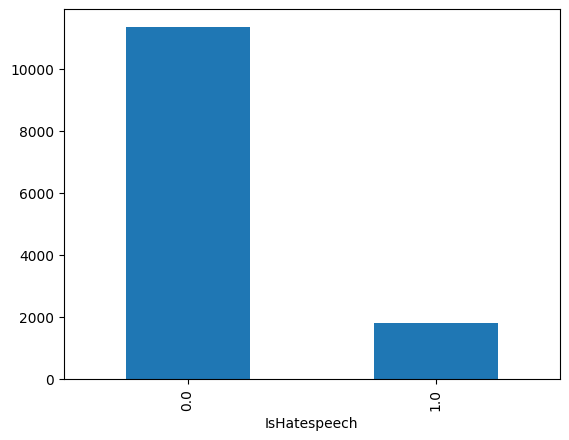

In [20]:
df['IsHatespeech'].value_counts().plot(kind='bar')

# **Word Count**

<Axes: >

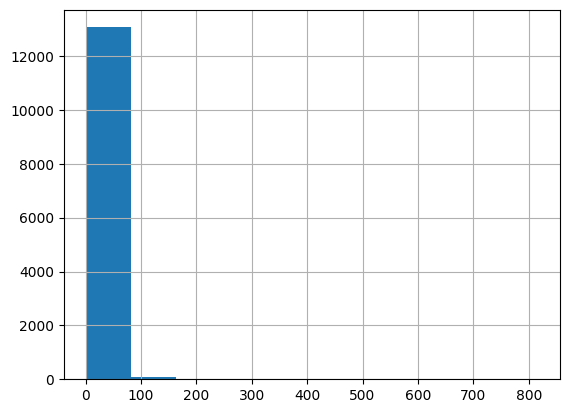

In [23]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))
df['word_count'].hist()

# **Character Count:**

<Axes: >

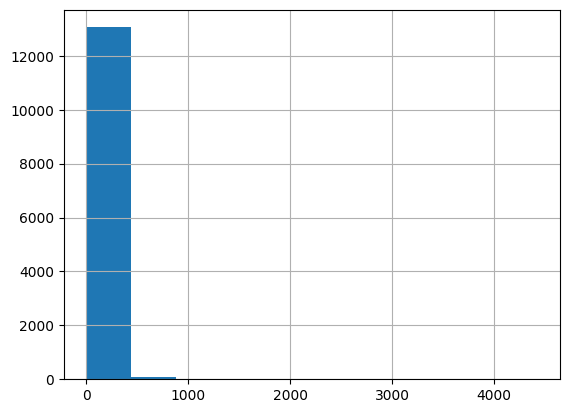

In [24]:
df['char_count'] = df['Text'].apply(len)
df['char_count'].hist()

# **Punctuation count**

<Axes: >

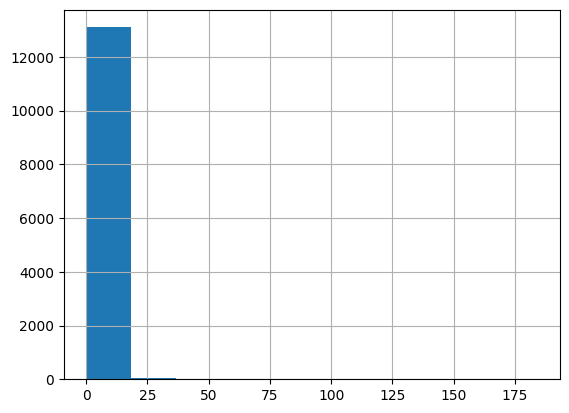

In [25]:
import string
df['punctuation_count'] = df['Text'].apply(lambda x: len([char for char in x if char in string.punctuation]))
df['punctuation_count'].hist()

<Axes: >

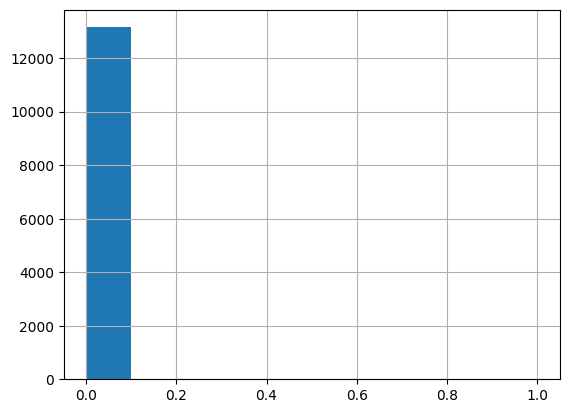

In [26]:
import re

def count_emojis(text):
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return len(emoji_pattern.findall(text))

df['emoji_count'] = df['Text'].apply(count_emojis)
df['emoji_count'].hist()